In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [23]:
from google.colab import files
uploaded = files.upload()


/tmp/ipython-input-2530537015.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_data.values, y=avg_data.index, palette='coolwarm')


Saving unemployment.zip to unemployment (1).zip


In [24]:
import zipfile
import os
with zipfile.ZipFile("unemployment.zip", 'r') as zip_ref:
    zip_ref.extractall(".")
print(os.listdir())


['.config', '.gradio', 'unemployment.zip', 'unemployment (1).zip', 'Unemployment_Rate_upto_11_2020.csv', 'Unemployment in India.csv', 'sample_data']


In [25]:
df = pd.read_csv("Unemployment_Rate_upto_11_2020.csv")


In [26]:
df.head()


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [27]:
print("Shape:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())
print("\nDuplicate Rows:", df.duplicated().sum())


Shape: (267, 9)

Data Types:
 Region                                       object
 Date                                        object
 Frequency                                   object
 Estimated Unemployment Rate (%)            float64
 Estimated Employed                           int64
 Estimated Labour Participation Rate (%)    float64
Region.1                                     object
longitude                                   float64
latitude                                    float64
dtype: object

Missing Values:
 Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

Duplicate Rows: 0


In [28]:
df.columns = df.columns.str.strip()
print(df.columns)


Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')


In [29]:
df['Date'] = df['Date'].str.strip()
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')


In [30]:
df.describe()


,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude
count,267,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,2020-06-16 09:15:30.337078528,12.236929,1.396211e+07,41.681573,22.826048,80.532425
min,2020-01-31 00:00:00,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,2020-03-31 00:00:00,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,2020-06-30 00:00:00,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,2020-08-31 00:00:00,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,2020-10-31 00:00:00,75.850000,5.943376e+07,69.690000,33.778200,92.937600
std,NaN,10.803283,1.336632e+07,7.845419,6.270731,5.831738


In [31]:
print(df.columns)


Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')


In [32]:
df.rename(columns={
    'Estimated Unemployment Rate (%)': 'Unemployment_Rate',
    'Estimated Employed': 'Employed',
    'Estimated Labour Participation Rate (%)': 'Labour_Participation_Rate',
    'Region.1': 'Region_Category'
}, inplace=True)


In [33]:
print(df.columns)


Index(['Region', 'Date', 'Frequency', 'Unemployment_Rate', 'Employed',
       'Labour_Participation_Rate', 'Region_Category', 'longitude',
       'latitude'],
      dtype='object')


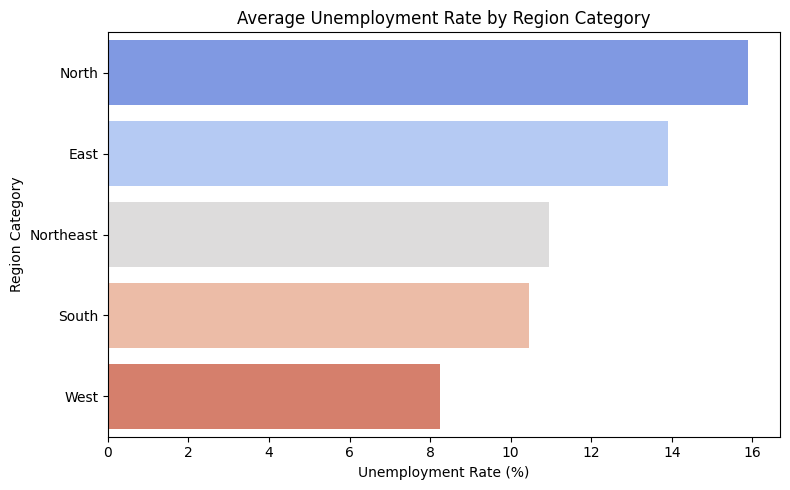

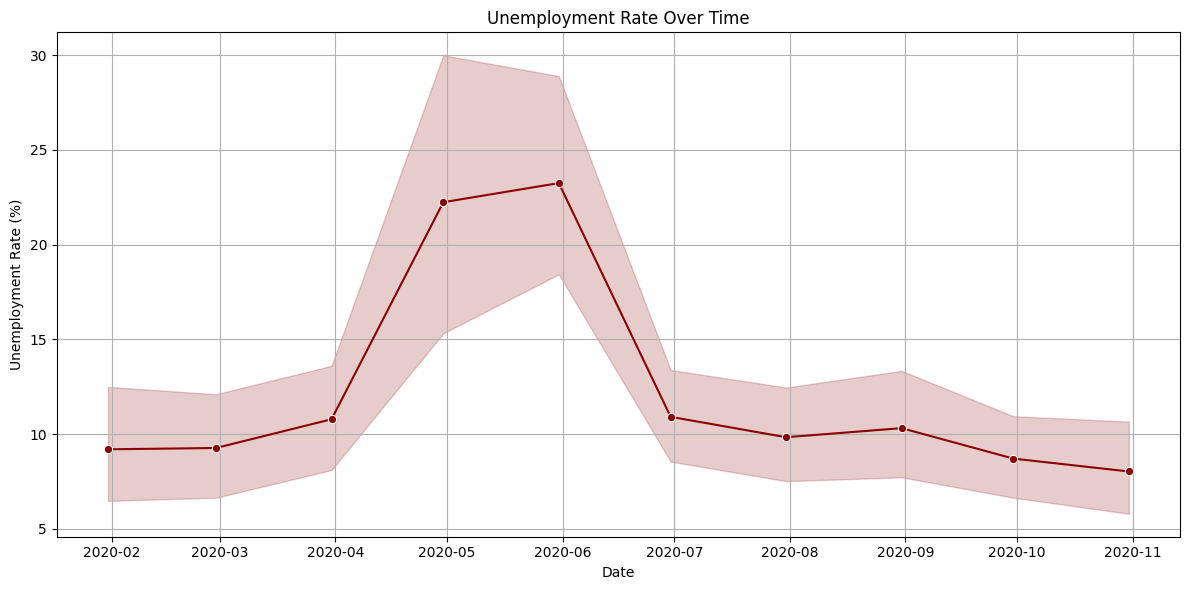

In [34]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='Unemployment_Rate', marker='o', color='darkred')
plt.title('Unemployment Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True)
plt.tight_layout()
plt.show()


/tmp/ipython-input-3152895847.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_avg.index, y=region_avg.values, palette='viridis')


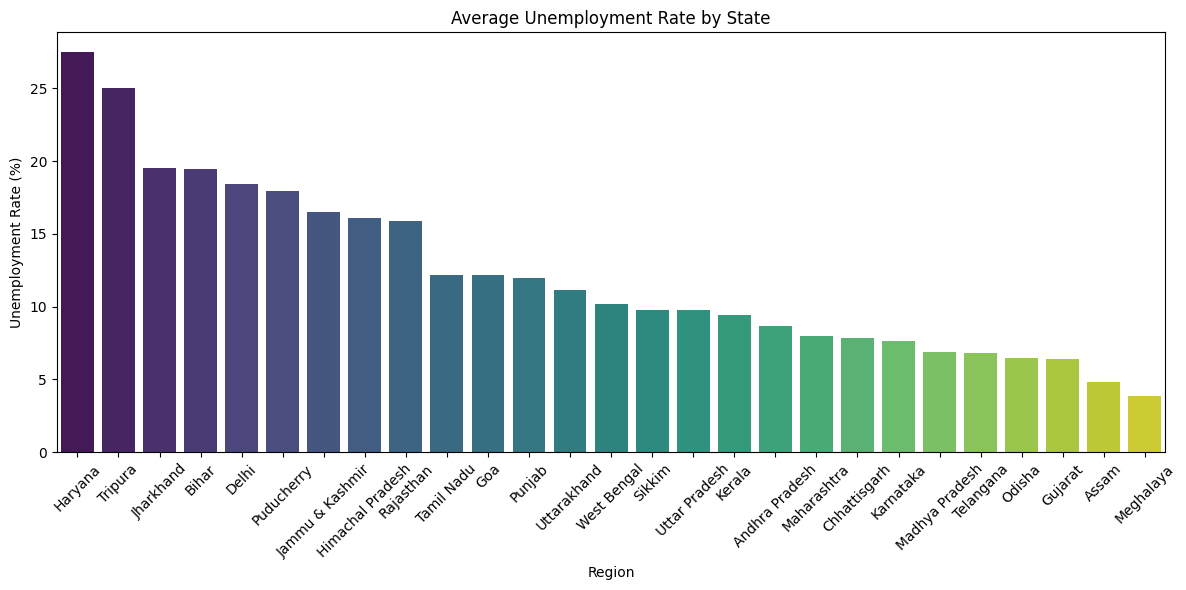

In [35]:
region_avg = df.groupby('Region')['Unemployment_Rate'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=region_avg.index, y=region_avg.values, palette='viridis')
plt.title('Average Unemployment Rate by State')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/tmp/ipython-input-3392450800.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_avg.index, y=category_avg.values, palette='Set2')


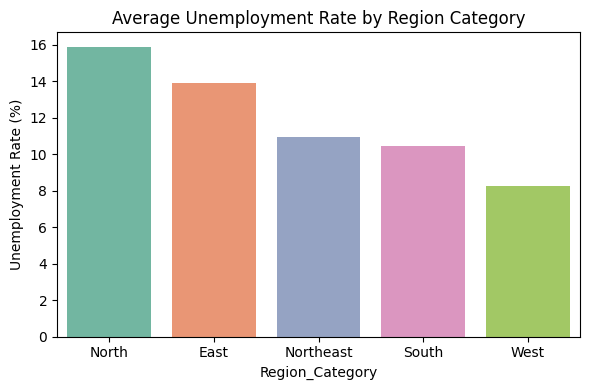

In [36]:
category_avg = df.groupby('Region_Category')['Unemployment_Rate'].mean().sort_values(ascending=False)
plt.figure(figsize=(6, 4))
sns.barplot(x=category_avg.index, y=category_avg.values, palette='Set2')
plt.title('Average Unemployment Rate by Region Category')
plt.ylabel('Unemployment Rate (%)')
plt.tight_layout()
plt.show()


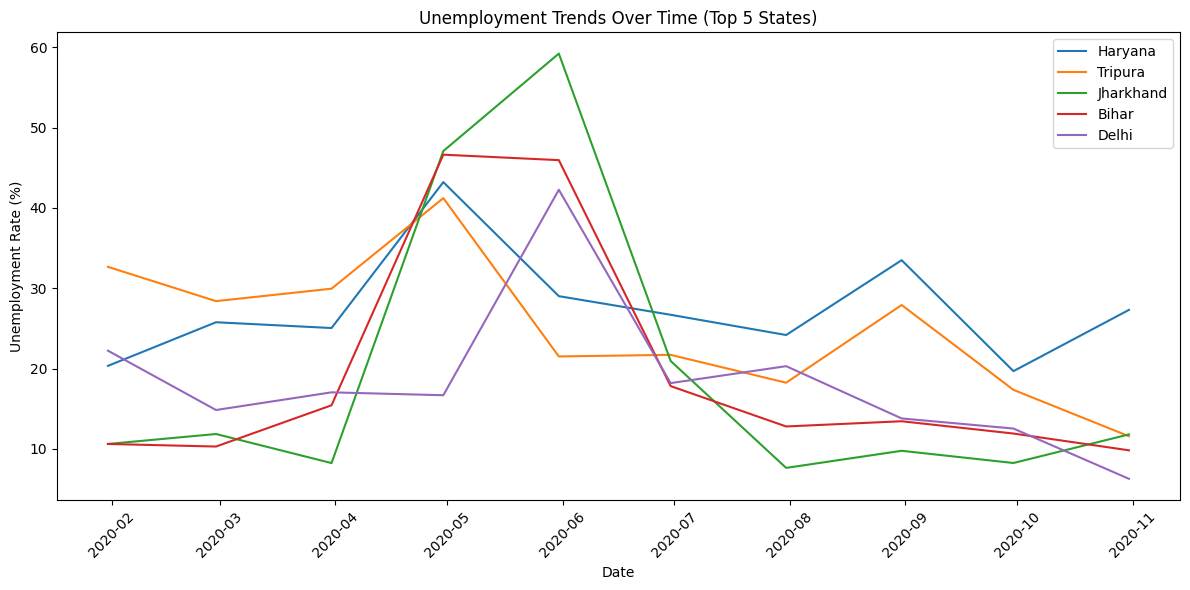

In [37]:
top_states = df.groupby('Region')['Unemployment_Rate'].mean().sort_values(ascending=False).head(5).index
plt.figure(figsize=(12, 6))
for state in top_states:
    state_data = df[df['Region'] == state]
    sns.lineplot(data=state_data, x='Date', y='Unemployment_Rate', label=state)
plt.title('Unemployment Trends Over Time (Top 5 States)')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


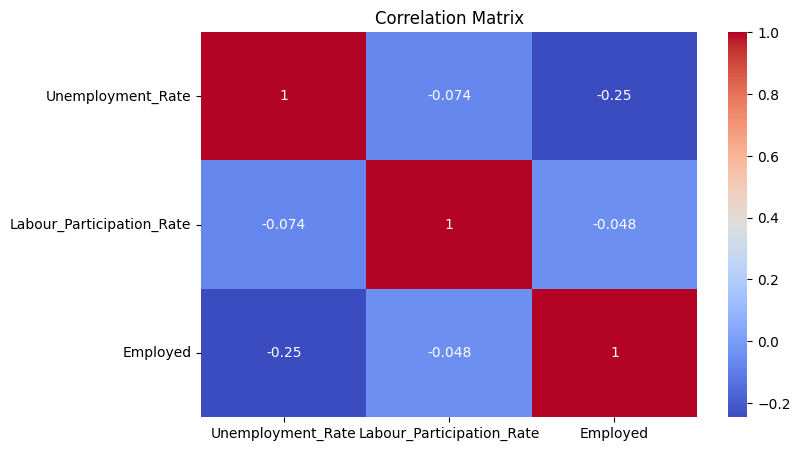

In [38]:
plt.figure(figsize=(8, 5))
sns.heatmap(df[['Unemployment_Rate', 'Labour_Participation_Rate', 'Employed']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


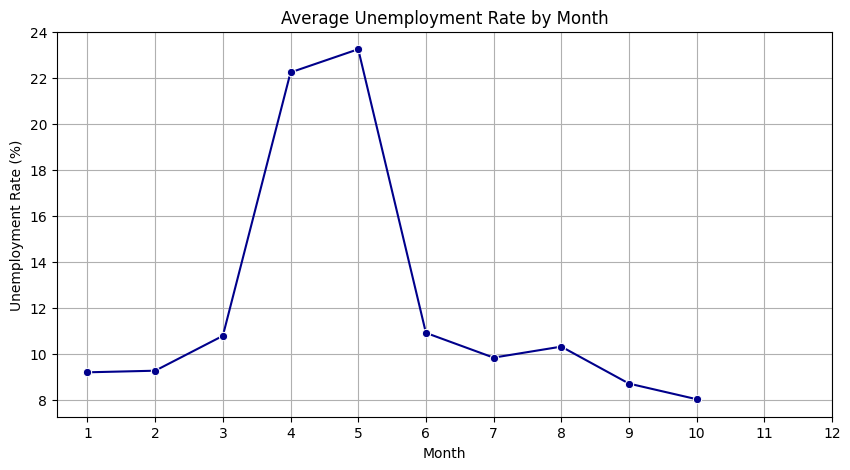

In [39]:
df['Month'] = df['Date'].dt.month
monthly_avg = df.groupby('Month')['Unemployment_Rate'].mean()
plt.figure(figsize=(10, 5))
sns.lineplot(x=monthly_avg.index, y=monthly_avg.values, marker='o', color='darkblue')
plt.title('Average Unemployment Rate by Month')
plt.xlabel('Month')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()


In [40]:
!pip install gradio


In [41]:
import pandas as pd
df = pd.read_csv("Unemployment_Rate_upto_11_2020.csv")
print(df.columns.tolist())


['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)', ' Estimated Employed', ' Estimated Labour Participation Rate (%)', 'Region.1', 'longitude', 'latitude']


In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gradio as gr
df = pd.read_csv("Unemployment_Rate_upto_11_2020.csv")
df.columns = df.columns.str.strip()
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
df['Date'] = pd.to_datetime(df['Date'], format="%d-%m-%Y")
df = df.rename(columns={
    'Estimated Unemployment Rate (%)': 'Unemployment_Rate',
    'Estimated Employed': 'Employed',
    'Estimated Labour Participation Rate (%)': 'Labour_Participation_Rate',
    'Region.1': 'Region_Category'
})
if 'Region_Category' not in df.columns:
    raise ValueError(f"'Region_Category' column not found even after renaming. Available columns: {df.columns.tolist()}")
region_categories = sorted(df['Region_Category'].dropna().unique())
def plot_by_category(category):
    filtered = df[df['Region_Category'] == category]
    if filtered.empty:
        return "No data for selected category."
    plt.figure(figsize=(10, 5))
    sns.lineplot(data=filtered, x='Date', y='Unemployment_Rate', marker='o', color='firebrick')
    plt.fill_between(filtered['Date'], filtered['Unemployment_Rate'], color='mistyrose')
    plt.title(f'Unemployment Rate Over Time ({category})')
    plt.xlabel('Date')
    plt.ylabel('Unemployment Rate (%)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    return plt.gcf()
def plot_avg_by_category():
    avg_data = df.groupby('Region_Category')['Unemployment_Rate'].mean().sort_values(ascending=False)
    plt.figure(figsize=(8, 5))
    sns.barplot(x=avg_data.values, y=avg_data.index, palette='coolwarm')
    plt.title("Average Unemployment Rate by Region Category")
    plt.xlabel("Unemployment Rate (%)")
    plt.ylabel("Region Category")
    plt.tight_layout()
    return plt.gcf()
with gr.Blocks() as demo:
    gr.Markdown("## Unemployment Analysis Dashboard (India)")
    gr.Markdown("Visualize unemployment trends by region category.")
    with gr.Row():
        dropdown = gr.Dropdown(choices=region_categories, label="Select Region Category", value=region_categories[0])
        plot_output = gr.Plot()
    dropdown.change(plot_by_category, inputs=dropdown, outputs=plot_output)
    gr.Markdown("### Average Unemployment Rate by Region Category (Overall)")
    avg_plot = gr.Plot()
    demo.load(fn=plot_avg_by_category, inputs=[], outputs=avg_plot)
demo.launch()


/tmp/ipython-input-2530537015.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://d76d73b15d2265eacb.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
